## How to see the documentation and Source code

In [1]:
?fig.add_subplot
# by this u can see the documentation

Object `fig.add_subplot` not found.


In [2]:
??fig.add_subplot
# u can see the source code

Object `fig.add_subplot` not found.


# Plotting and Visualization

Making plots and static or interactive visualizations is one of the most important tasks
in data analysis. It may be a part of the exploratory process; for example, helping identify
outliers, needed data transformations, or coming up with ideas for models. For
others, building an interactive visualization for the web using a toolkit like d3.js (http:
//d3js.org/) may be the end goal. Python has many visualization tools (see the end of
this chapter), but I’ll be mainly focused on matplotlib (http://matplotlib.sourceforge
.net).
matplotlib is a (primarily 2D) desktop plotting package designed for creating publication-
quality plots. The project was started by John Hunter in 2002 to enable a MATLAB-
like plotting interface in Python. He, Fernando Pérez (of IPython), and others have
collaborated for many years since then to make IPython combined with matplotlib a
very functional and productive environment for scientific computing. When used in
tandem with a GUI toolkit (for example, within IPython), matplotlib has interactive
features like zooming and panning. It supports many different GUI backends on all
operating systems and additionally can export graphics to all of the common vector
and raster graphics formats: PDF, SVG, JPG, PNG, BMP, GIF, etc. I have used it to
produce almost all of the graphics outside of diagrams in this book.
matplotlib has a number of add-on toolkits, such as mplot3d for 3D plots and basemap
for mapping and projections. I will give an example using basemap to plot data on a map
and to read shapefiles at the end of the chapter.
To follow along with the code examples in the chapter, make sure you have started
IPython in Pylab mode (ipython --pylab) or enabled GUI event loop integration with
the %gui magic

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

%matplotlib notebook

## A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt

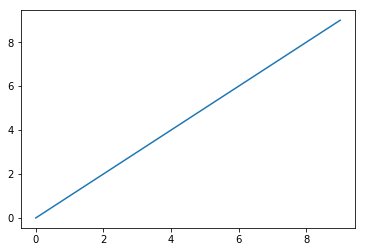

In [3]:
import numpy as np
data = np.arange(10)
data
plt.plot(data)

### Figures and Subplots

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Plots in matplotlib reside within a Figure object. You can create a new figure with
plt.figure

If you are in pylab mode in IPython, a new empty window should pop up. plt.fig
ure has a number of options, notably figsize will guarantee the figure has a certain size
and aspect ratio if saved to disk. Figures in matplotlib also support a numbering scheme
(for example, plt.figure(2)) that mimics MATLAB. You can get a reference to the
active figure using plt.gcf().

You can’t make a plot with a blank figure. You have to create one or more subplots
using add_subplot:
ax1 = fig.add_subplot(2, 2, 1)

This means that the figure should be 2 × 2, and we’re selecting the first of 4 subplots
(numbered from 1). If you create the next two subplots, you’ll end up with a figure that
looks like

The 'k--' is a style option instructing matplotlib to plot a black dashed line. The objects
returned by fig.add_subplot above are AxesSubplot objects, on which you can directly
plot on the other empty subplots by calling each one’s instance methods

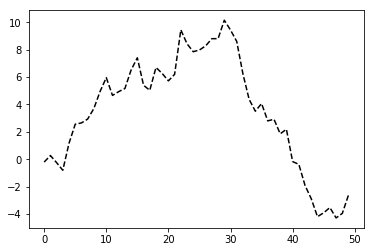

In [7]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

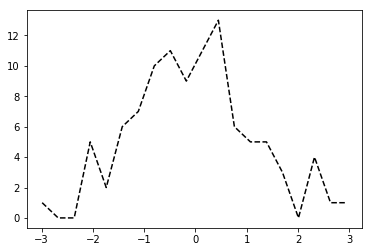

In [20]:
something=ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
type(something)
x=something[0]
y=something[1]
# x.shape 20
# y.shape 21
y=np.delete(y,[len(y)-1])
y.shape

In [11]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

You can find a comprehensive catalogue of plot types in the matplotlib documentation.
Since creating a figure with multiple subplots according to a particular layout is such
a common task, there is a convenience method, plt.subplots, that creates a new figure
and returns a NumPy array containing the created subplot objects

In [28]:
# x=np.random.randn(10)
# print(x)
# x.cumsum()

In [12]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1B80A2F60>,
      dtype=object)

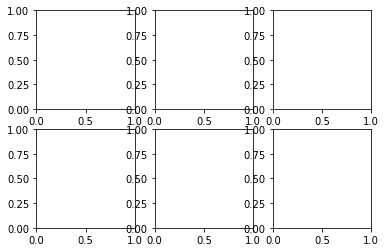

In [13]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

wspace and hspace controls the percent of the figure width and figure height, respectively,
to use as spacing between subplots. Here is a small example where I shrink the
spacing all the way to zero

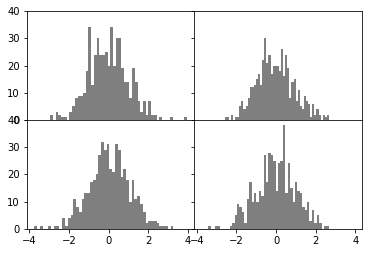

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

Matplotlib’s main plot function accepts arrays of X and Y coordinates and optionally
a string abbreviation indicating color and line style. For example, to plot x versus y with
green dashes, you would execute

ax.plot(x, y, 'g--')

ax.plot(x, y, linestyle='--', color='g')

In [15]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

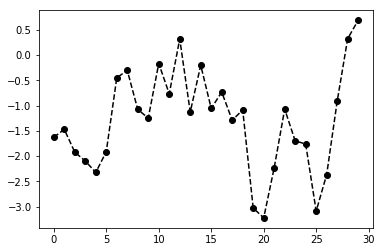

In [16]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

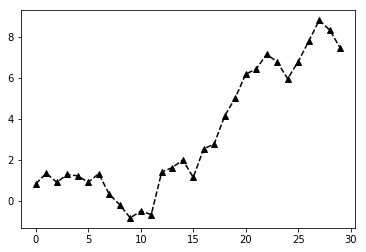

In [17]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='^')

In [18]:
plt.close('all')

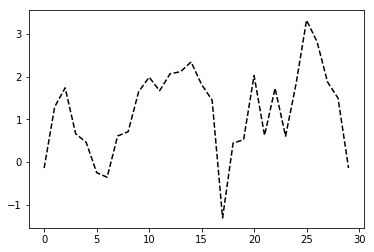

In [19]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')


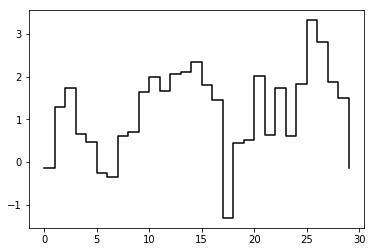

In [20]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')


No handles with labels found to put in legend.


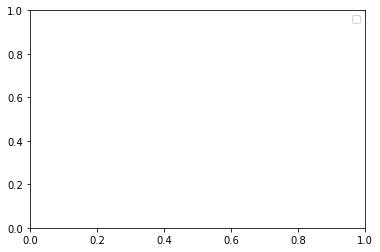

In [21]:
plt.legend(loc='best')

### Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: using the
procedural pyplot interface (which will be very familiar to MATLAB users) and the
more object-oriented native matplotlib API.

The pyplot interface, designed for interactive use, consists of methods like xlim,
xticks, and xticklabels. These control the plot range, tick locations, and tick labels,
respectively. They can be used in two ways:

• Called with no arguments returns the current parameter value. For example
plt.xlim() returns the current X axis plotting range

• Called with parameters sets the parameter value. So plt.xlim([0, 10]), sets the X
axis range to 0 to 10

All such methods act on the active or most recently-created AxesSubplot. Each of them
corresponds to two methods on the subplot object itself; in the case of xlim these are
ax.get_xlim and ax.set_xlim. I prefer to use the subplot instance methods myself in
the interest of being explicit (and especially when working with multiple subplots), but
you can certainly use whichever you find more convenient.

#### Setting the title, axis labels, ticks, and ticklabels

To illustrate customizing the axes, I’ll create a simple figure and plot of a random walk



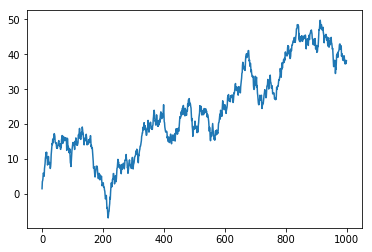

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

### Now adding styles, labels and legends

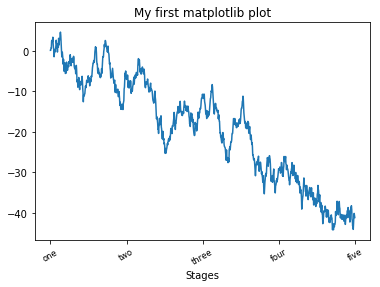

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.plot(np.random.randn(1000).cumsum())

props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

#### Adding legends

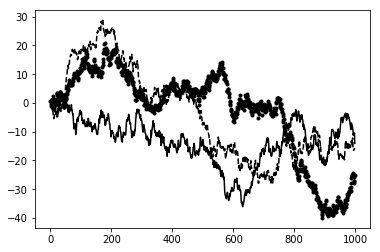

In [25]:
from numpy.random import randn
fig = plt.figure(); 
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [42]:
ax.legend(loc='best')

No handles with labels found to put in legend.


### Annotations and Drawing on a Subplot

ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)

Index(['SPX'], dtype='object')


Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

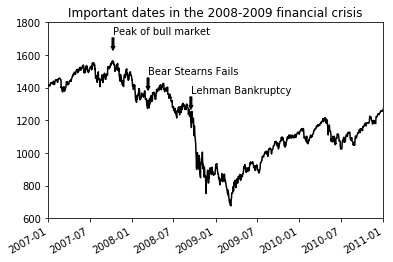

In [46]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
# print(data.columns)
spx = data['SPX']
# print(spx.head(10))
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [47]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

Text(0.5,1,'Important dates in the 2008–2009 financial crisis')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

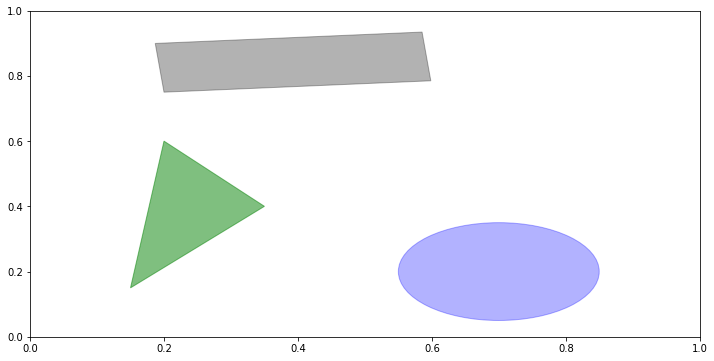

In [50]:
fig = plt.figure(figsize=(12, 6)); 
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15,angle=5, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

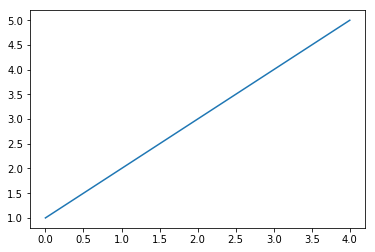

In [52]:
plt.plot([1,2,3,4,5])
plt.savefig('figpath.png',dpi=400,bbox_inches='tight')

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

savefig doesn’t have to write to disk; it can also write to any file-like object, such as a
StringIO:

from io import BytesIO

buffer = BytesIO()

plt.savefig(buffer)

plot_data = buffer.getvalue()

### matplotlib Configuration

plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

## Plotting with pandas and seaborn

As you’ve seen, matplotlib is actually a fairly low-level tool. You assemble a plot from
its base components: the data display (the type of plot: line, bar, box, scatter, contour,
etc.), legend, title, tick labels, and other annotations. Part of the reason for this is that
in many cases the data needed to make a complete plot is spread across many objects.
In pandas we have row labels, column labels, and possibly grouping information. This
means that many kinds of fully-formed plots that would ordinarily require a lot of
matplotlib code can be expressed in one or two concise statements. Therefore, pandas
has an increasing number of high-level plotting methods for creating standard visualizations
that take advantage of how data is organized in DataFrame objects

### Line Plots

Series and DataFrame each have a plot method for making many different plot types.
By default, they make line plots

The Series object’s index is passed to matplotlib for plotting on the X axis, though this
can be disabled by passing use_index=False. The X axis ticks and limits can be adjusted
using the xticks and xlim options, and Y axis respectively using yticks and ylim

<class 'pandas.core.series.Series'>


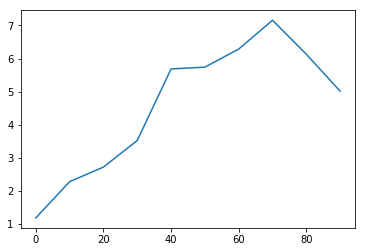

In [32]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
print(type(s))
s.plot()

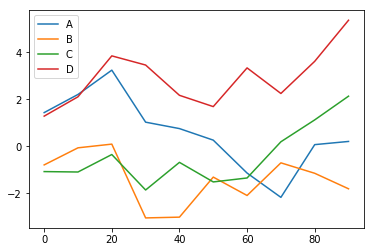

In [33]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

Making bar plots instead of line plots is a simple as passing kind='bar' (for vertical
bars) or kind='barh' (for horizontal bars). In this case, the Series or DataFrame index
will be used as the X (bar) or Y (barh) ticks

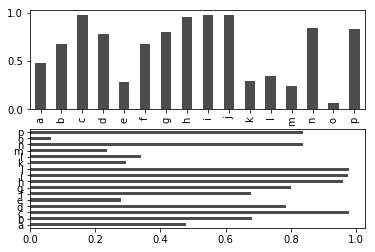

In [55]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [56]:
# what is axes
print(axes[:20])

# what is fig


In [58]:
np.random.seed(12348)

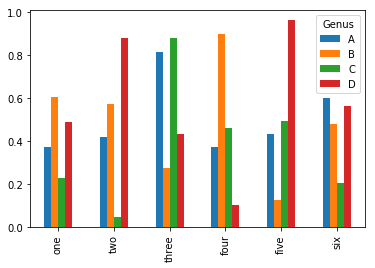

In [59]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

In [60]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

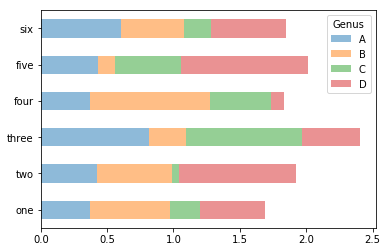

In [61]:
df.plot.barh(stacked=True, alpha=0.5)

In [62]:
plt.close('all')

In [63]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
print(party_counts)
print()
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
print(party_counts)

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

size   2   3   4  5
day                
Fri   16   1   1  0
Sat   53  18  13  1
Sun   39  15  18  3
Thur  48   4   5  1


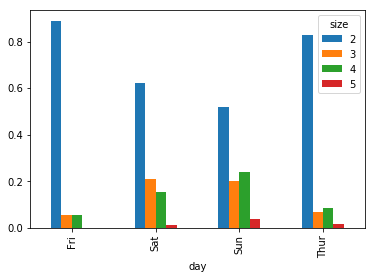

In [64]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

In [65]:
plt.close('all')

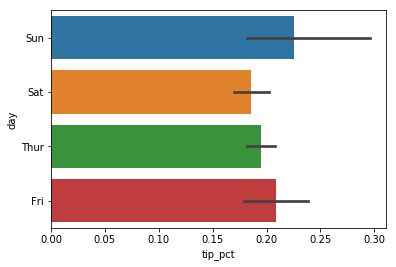

In [66]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [45]:
plt.close('all')

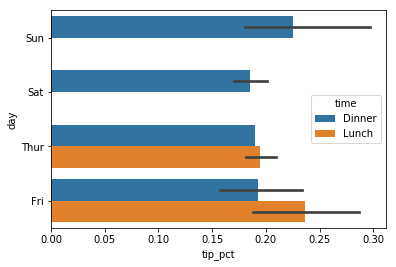

In [46]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [47]:
plt.close('all')

In [48]:
sns.set(style="whitegrid")

### Histograms and Density Plots

In [67]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

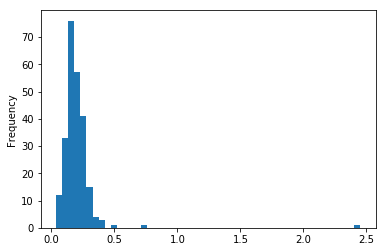

In [68]:
tips['tip_pct'].plot.hist(bins=50)

In [69]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

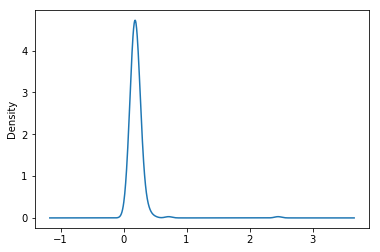

In [70]:
tips['tip_pct'].plot.density()

In [71]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

C:\Users\saurabh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


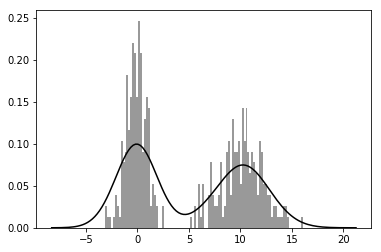

In [72]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [73]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [74]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5,1,'Changes in log m1 versus log unemp')

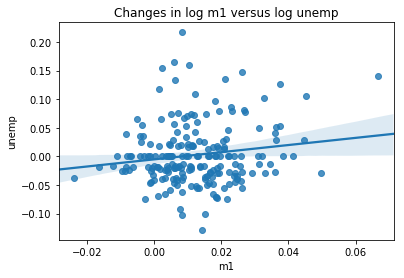

In [75]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

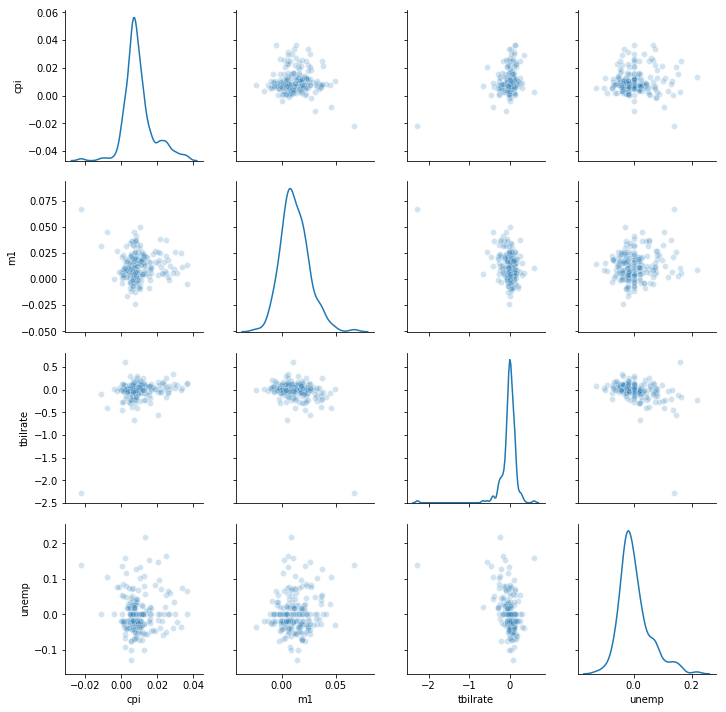

In [76]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

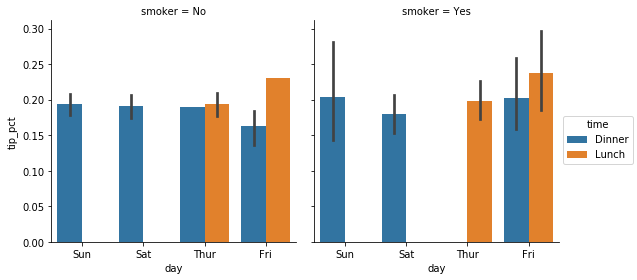

In [77]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

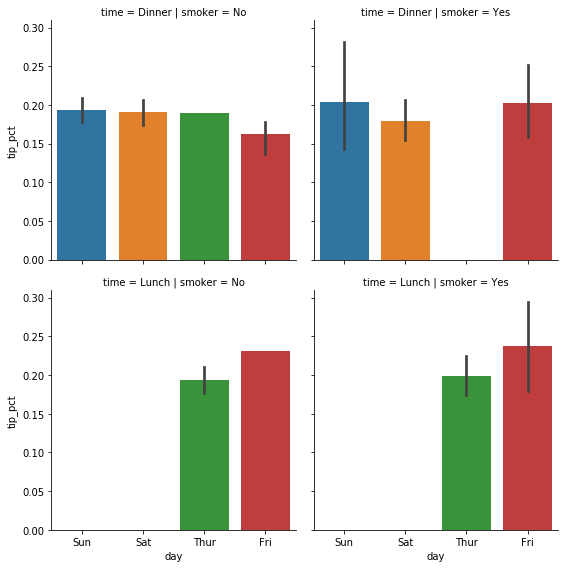

In [78]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

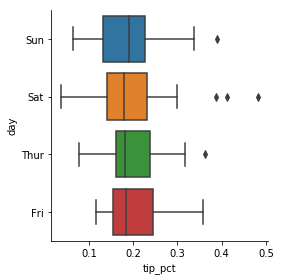

In [79]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

In [80]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion